In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras

In [1]:
datatrain_dir = 'SportBallsDataset/train'

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
image_height = 256
batch_size=32
train_ds = image_dataset_from_directory(
  datatrain_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 4752 files belonging to 10 classes.
Using 3802 files for training.


In [5]:
path = r'SportBallsDataset/train'
classS = os.listdir(path)
for file in classS:
    print(file)

american_football
baseball
basketball
bowling_ball
football
golf_ball
rugby_ball
table_tennis_ball
tennis_ball
volleyball


In [6]:
val_ds = image_dataset_from_directory(
  datatrain_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 4752 files belonging to 10 classes.
Using 950 files for validation.


In [7]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [8]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,  
  epochs=epochs
)

Epoch 1/10
119/119 [==============================] - 306s 3s/step - loss: 0.8798 - accuracy: 0.7278 - val_loss: 0.7034 - val_accuracy: 0.7937
Epoch 2/10
119/119 [==============================] - 295s 2s/step - loss: 0.3458 - accuracy: 0.8861 - val_loss: 0.5853 - val_accuracy: 0.8337
Epoch 3/10
119/119 [==============================] - 292s 2s/step - loss: 0.2000 - accuracy: 0.9385 - val_loss: 0.6386 - val_accuracy: 0.8379
Epoch 4/10
119/119 [==============================] - 304s 3s/step - loss: 0.1430 - accuracy: 0.9550 - val_loss: 0.5180 - val_accuracy: 0.8632
Epoch 5/10
119/119 [==============================] - 295s 2s/step - loss: 0.0780 - accuracy: 0.9795 - val_loss: 0.5456 - val_accuracy: 0.8579
Epoch 6/10
119/119 [==============================] - 299s 3s/step - loss: 0.0430 - accuracy: 0.9934 - val_loss: 0.6654 - val_accuracy: 0.8411
Epoch 7/10
119/119 [==============================] - 285s 2s/step - loss: 0.0330 - accuracy: 0.9934 - val_loss: 0.5306 - val_accuracy: 0.8726

In [13]:
def predict_img(fpath):
    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    # print(image)
    pred=resnet_model.predict(image)
    output=classS[np.argmax(pred)]
    print(output)

Now let us look at the predictions for test images!

1/1 [==============================] - 0s 83ms/step
bowling_ball


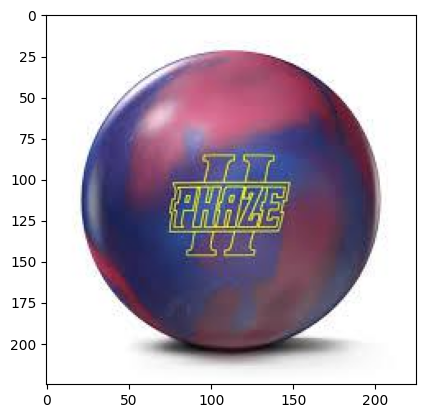

In [14]:
predict_img('SportBallsDataset/test/bowling_ball/bowling_ball_12.jpg')

1/1 [==============================] - 0s 83ms/step
rugby_ball


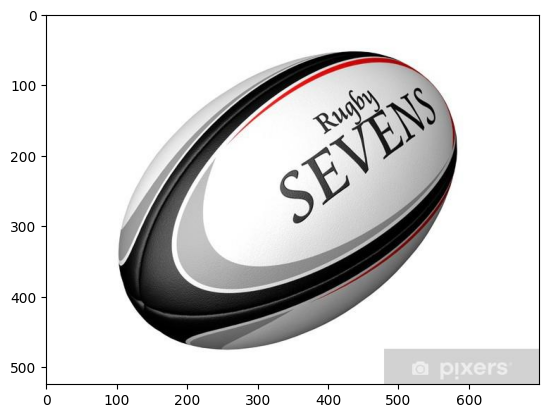

In [15]:
predict_img('SportBallsDataset/test/rugby_ball/rugby_ball_9.jpg')

In [16]:
resnet_model.save("sportBalls_model.h5")

d:\Workkkkk\1204303\Project\env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
